# Problem 1. 

Create a CNN. Train your network on a small portion of Kaggle dogs-vs-cats dataset. A zip file with that dataset is provided in the folder for week 5 on the class site. Use the same counts (1000, 500, 500) of images for the train, validation as test portion of the dataset as used in the notebook. Select images for all three subsets: train, validate and test, randomly from the big train set. Prove that your model works by displaying training and validation accuracy vs epoch number. Next use EarclyStoping callback ModelCheckpoint callback to save the best model, i.e. the model with the highest accuracy. Be patient for 5 epochs. Can you find out the epoche that gave the best model. Save your “best” model. We will use it in the next problem

In [ ]:
import os, shutil
import numpy as np

In [ ]:
#create directories

# The path to the directory where the original dataset was uncompressed
original_dataset_dir = '/Users/Matt/CS89/dogs-vs-cats/train'

# The directory where we will
# store our smaller dataset
base_dir = 'cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
#obtain directory of all file names
files = os.listdir(original_dataset_dir)
len(files)

In [ ]:
#create lists of cat and dog names
cat_files = [x for x in files if x.startswith("cat")]
dog_files = [x for x in files if x.startswith("dog")]

In [ ]:
#populate train cats directory with 1000 images
while len(os.listdir(train_cats_dir)) < 1000:
    img = np.random.choice(cat_files)
    src = os.path.join(original_dataset_dir, img)
    dst = os.path.join(train_cats_dir, img)
    shutil.copyfile(src, dst)

In [ ]:
#populate validation cats directory with 500 images
while len(os.listdir(validation_cats_dir)) < 500:
    img = np.random.choice(cat_files)
    src = os.path.join(original_dataset_dir, img)
    dst = os.path.join(validation_cats_dir, img)
    shutil.copyfile(src, dst)

In [ ]:
#populate test cats directory with 500 images
while len(os.listdir(test_cats_dir)) < 500:
    img = np.random.choice(cat_files)
    src = os.path.join(original_dataset_dir, img)
    dst = os.path.join(test_cats_dir, img)
    shutil.copyfile(src, dst)

In [ ]:
# Copy 1000 dog images randomly to train_dogs_dir
while len(os.listdir(train_dogs_dir)) < 1000:
    img = np.random.choice(dog_files)
    src = os.path.join(original_dataset_dir, img)
    dst = os.path.join(train_dogs_dir, img)
    shutil.copyfile(src, dst)

In [ ]:
# Copy 500 dog images randomly to dogs validation
while len(os.listdir(validation_dogs_dir)) < 500:
    img = np.random.choice(dog_files)
    src = os.path.join(original_dataset_dir, img)
    dst = os.path.join(validation_dogs_dir, img)
    shutil.copyfile(src, dst)

In [ ]:
# Copy 500 dog images randomly to dogs test
while len(os.listdir(test_dogs_dir)) < 500:
    img = np.random.choice(dog_files)
    src = os.path.join(original_dataset_dir, img)
    dst = os.path.join(test_dogs_dir, img)
    shutil.copyfile(src, dst)

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

In [ ]:
#build the model
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
#compile the model
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
#pre-process the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

In [ ]:
#add early stopping callback
from tensorflow.keras import callbacks
checkpoint_cb = callbacks.ModelCheckpoint("HW05.h5", save_best_only=True, monitor='val_acc') 
early_stopping_cb = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50, callbacks=[checkpoint_cb, early_stopping_cb])

model = models.load_model("HW05.h5") # roll back to best model

In [ ]:
model.save('cats_and_dogs_small_1.h5')

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The model obtained its highest validation accuracy in epoch 9, and stopped training after epoch 14.

# Problem 2.  Load the model saved in the previous problem and start new analysis similar to the one presented in the section “Visualizing intermediate activations” of the attached Jupyter notebook 5.4-visualizing-what-convnets-learn00.ipynb. Fetch a jpg of a lion’s head from Google images, trim it to size 150x150 pixels using OpenCV and repeat the analysis in the notebook.  Lion is very big cat and the results should be close to what we have seen with cats. Visualize intermediate activations in the first convnet layer, for the channels with indexes 2 and 28. You are demonstrating that the code works. Please display intermediate activations for the third and the fourth conv layers. 

In [1]:
from tensorflow import keras
keras.__version__

2023-10-13 15:08:44.797159: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.10.0'

In [2]:
#load the model from Problem 1 and inspect structure
model = keras.models.load_model('cats_and_dogs_small_1.h5')
model.summary()

2023-10-13 15:08:57.913804: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [10]:
#import opencv
import cv2
import matplotlib.pyplot as plt
import numpy as np

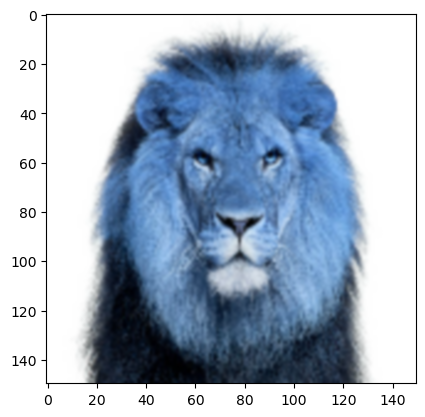

In [7]:
#read and re-size image
img = cv2.imread('lionshead.jpeg', 1)
imgResized = cv2.resize(img, (150,150))

# Display img with window name 
plt.imshow(imgResized, interpolation = 'bicubic')
plt.show()

In [8]:
imgResized.shape

(150, 150, 3)

In [11]:
#reshape image for convolution
img1 = np.expand_dims(imgResized, 0)

In [17]:
#convert data type
img1.astype('float32')

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [18]:
#inspect shape
img1.shape

(1, 150, 150, 3)

In [21]:
#normalize image
img1 = img1/255.

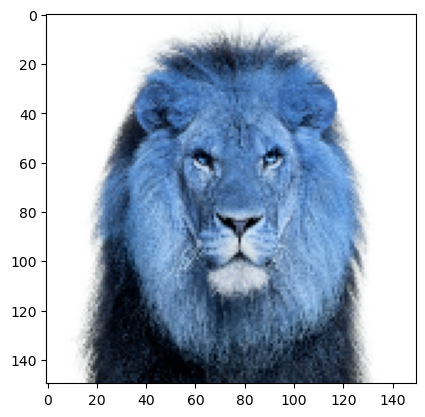

In [24]:
plt.imshow(img1[0]) 

In [34]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [35]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img1)

1/1 [==============================] - 0s 150ms/step


In [36]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


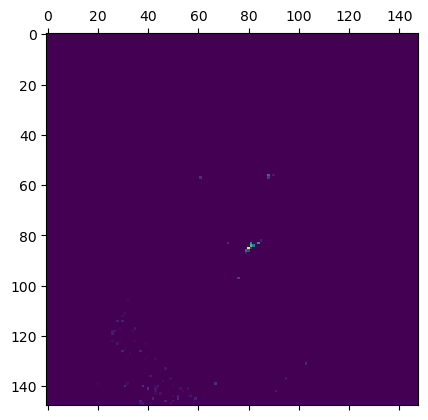

In [43]:
#inspect 2nd index channel
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
plt.show()

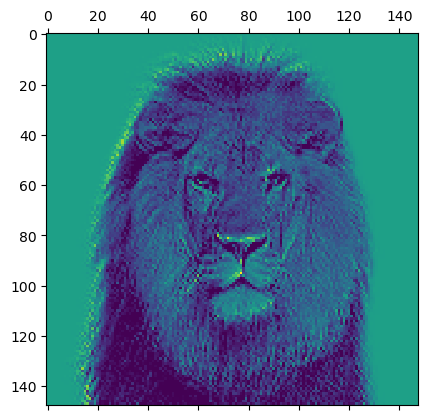

In [44]:
#inspect 28th index channel
plt.matshow(first_layer_activation[0, :, :, 28], cmap='viridis')
plt.show()

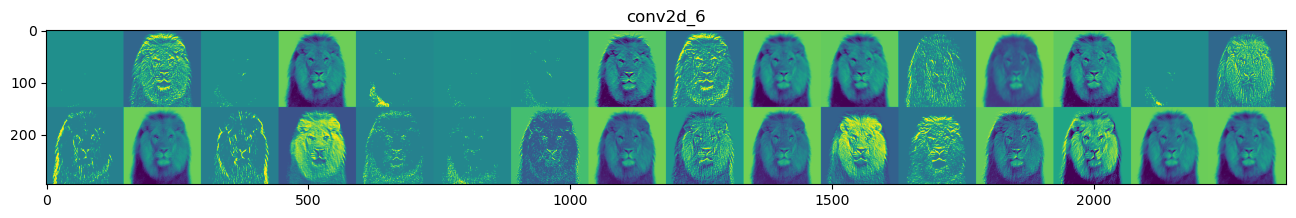

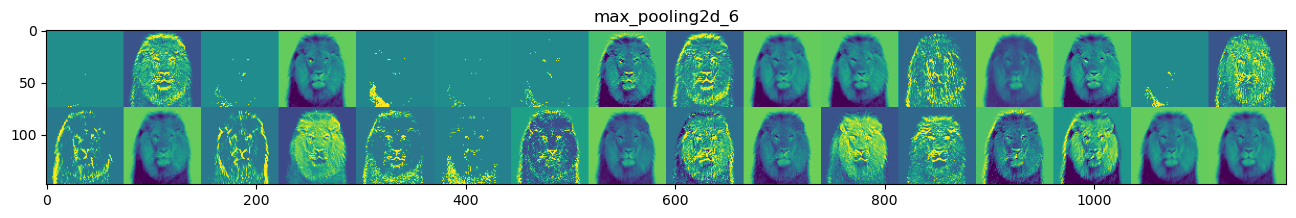

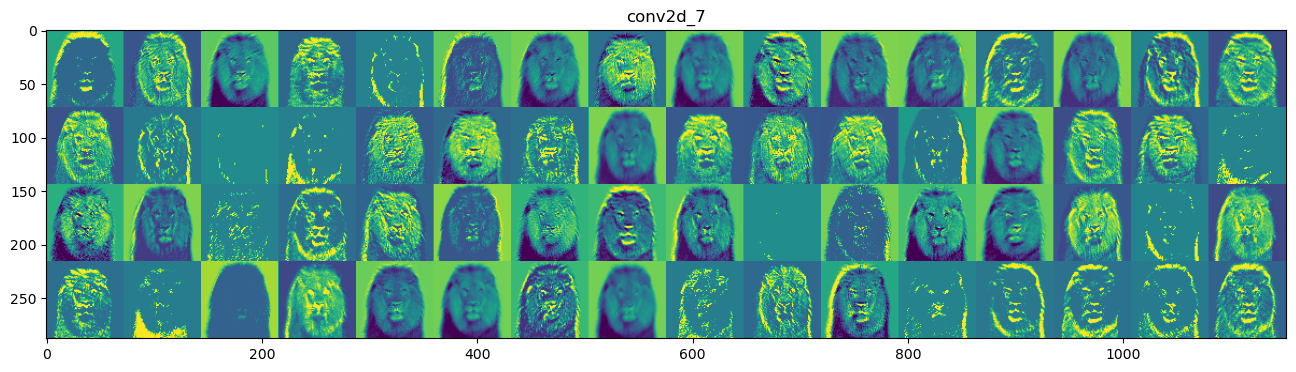

In [47]:
import keras

# inspect intermediate activations for 3rd (conv2d_6) and 4th (conv2d_7) conv layers 
layer_names = []
for layer in model.layers[4:7]:
    layer_names.append(layer.name)

images_per_row = 16

# display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()


# Problem 3. 

This time we want to find images that excite various filters the most. Start with the code in the attached Jupyter notebook chapter09_visualizing_VGG16_filters_and_heatmap.ipynb

Code in the notebook works with VGG16 network. Modify the code so it works with the model saved in Problem 1.   Display the list of layers. Display 8 or 16 such images for     filters in each convolutional layer of the NN. This time we have different names and        numbers   of layers but the process should be the same.  You can display generated           images in your notebook or store them on the operating system and then import them into your notebook.


In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [91]:
#create list of layer names
layer_names = []
for layer in model.layers:
    if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
        print(layer.name)
        layer_names.append(layer.name)

conv2d_4
conv2d_5
conv2d_6
conv2d_7


In [76]:
#Define Utility function to convert a tensor into a valid image

def deprocess_image(image):
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    # normilize values with in the range [0,255]
    image = np.clip(image, 0, 255).astype("uint8")
    # crop the image around the center to avoid border effects
    image = image[25:-25, 25:-25, :]
    return image

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


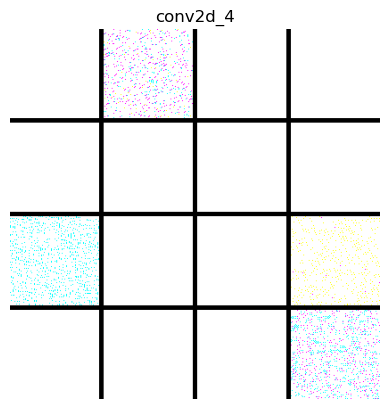

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


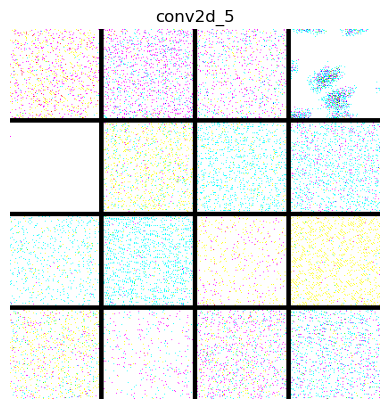

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


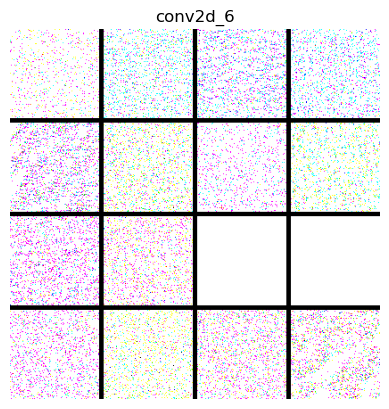

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


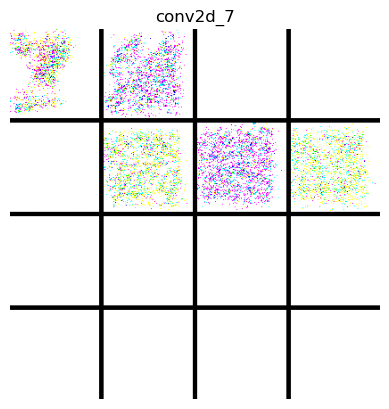

In [114]:
#create for loop to generate filter images for each layer
for value in layer_names:
    layer = model.get_layer(name=value)
    feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

    #The loss function takes an image tensor and the index of the filter we are considering (an integer).
    def compute_loss(image, filter_index):
        activation = feature_extractor(image)
    # Note that we avoid border artifacts by only involving non-border pixels
    # in the loss; we discard the first two pixels along the sides of the activation    
        filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    # Return the mean of the activation values for the filter.
        return tf.reduce_mean(filter_activation)
    
    @tf.function
    def gradient_ascent_step(image, filter_index, learning_rate):
        with tf.GradientTape() as tape:
            # we have to wathc image tensor. It is not a TF variable
            tape.watch(image)
            # Compute the loss scalar, indicating how much the current image activates the filter.
            loss = compute_loss(image, filter_index)
        # Compute the gradients of the loss with respect to the image.
        grads = tape.gradient(loss, image)
        # Normilize the gradient by deviding it with its l2 norm
        grads = tf.math.l2_normalize(grads)
        # Move the image a little bit in a direction that activates our target filter more strongly
        image += learning_rate * grads
        # Return the updated image so we can run the step function in a loop.
        return image
    
    #Function to generate filter visualizations

    img_width = 150
    img_height = 150

    def generate_filter_pattern(filter_index):
        # number of gradient ascent steps to apply
        iterations = 30
        # Aplitude of a single step
        learning_rate = 10.
        # Initialize an image tensor with random values 
        # here we pick a range centered on 0.5).
        image = tf.random.uniform(
            minval=0.4,
            maxval=0.6,
            shape=(1, img_width, img_height, 3))
        # Repeatedly update the values of the image
        # tensor so as to maximize our loss function
        for i in range(iterations):
            image = gradient_ascent_step(image, filter_index, learning_rate)
        return image[0].numpy()
    
    all_images2 = []
    for filter_index in range(16):
        print(f"Processing filter {filter_index}")
        image = deprocess_image(generate_filter_pattern(filter_index))
        all_images2.append(image)
         
        
    # Prepare a blank canvas for us to paste filter visualizations on.
    margin = 5
    n = 4
    cropped_width = img_width - 25 * 2
    cropped_height = img_height - 25 * 2
    width = n * cropped_width + (n - 1) * margin
    height = n * cropped_height + (n - 1) * margin
    stitched_filters = np.zeros((width, height, 3))

    # Fill the picture with the saved filters.
    for i in range(n):
        for j in range(n):
            image = all_images2[i * n + j]
            stitched_filters[
                (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
                (cropped_height + margin) * j : (cropped_height + margin) * j
                + cropped_height, :,] = image

    # save the canvas to disk
        keras.utils.save_img(
        f"filters_for_layer_{value}.png", stitched_filters)
        
    # Display the grid
    plt.title(value)
    plt.axis("off") 
    plt.imshow(stitched_filters,)
    plt.show()

In [120]:
from PIL import Image

In [124]:
#load filter images for display
img1 = Image.open("filters_for_layer_conv2d_4.png")
img2 = Image.open("filters_for_layer_conv2d_5.png")
img3 = Image.open("filters_for_layer_conv2d_6.png")
img4 = Image.open("filters_for_layer_conv2d_7.png")

<function matplotlib.pyplot.show(close=None, block=None)>

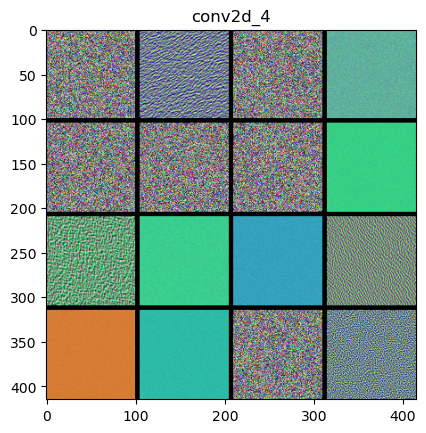

In [130]:
plt.title('conv2d_4')
plt.imshow(img1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

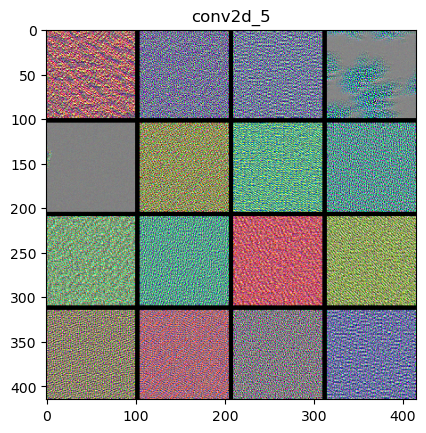

In [131]:
plt.title('conv2d_5')
plt.imshow(img2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

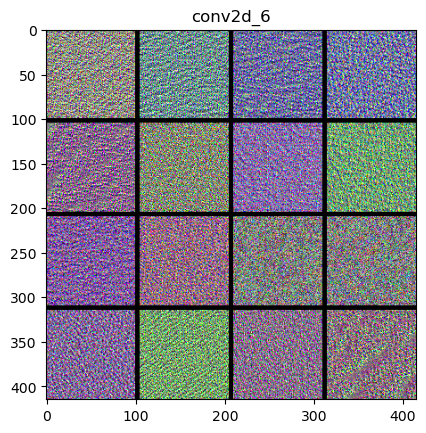

In [132]:
plt.title('conv2d_6')
plt.imshow(img3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

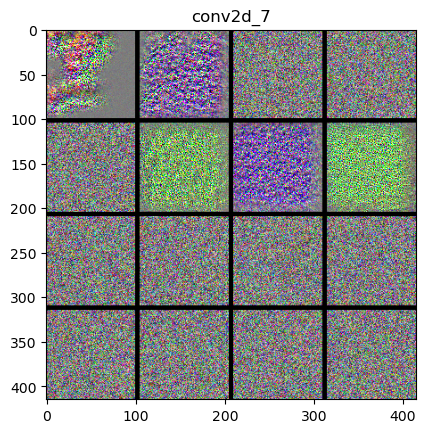

In [133]:
plt.title('conv2d_7')
plt.imshow(img4)
plt.show

# Problem 4. 

Test the generation of the Class Activation Map visualization (generation of a heatmap) using a pre-trained VGG16 network with an image of two elephants contained in attached file creative_commons_elephants.jpg. Superimpose generated heatmap over the image with two elephants image using OpenCV Api

In [135]:
#load VGG16 model
model1 = keras.applications.VGG16(
    weights="imagenet")

553467096/553467096 [==============================] - 21s 0us/step


In [140]:
model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [136]:
# VGG16 load and preprocess image of elephants
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# The local path to our target image
img_path = '/Users/Matt/CS89/creative_commons_elephant.jpeg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))

# `x` is a float32 Numpy array of shape (224, 224, 3)
img_array = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
img_array = preprocess_input(img_array)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


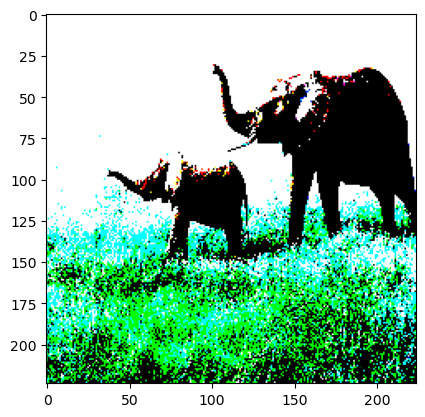

In [137]:
#show image
plt.imshow(img_array[0])
plt.show()

In [156]:
#generate predictions for image labels
preds = model1.predict(img_array)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 426ms/step
Predicted: [('n02504458', 'African_elephant', 0.8877051), ('n01871265', 'tusker', 0.10865437), ('n02504013', 'Indian_elephant', 0.003560652)]


In [157]:
# VGG16 obtain last conv layer model
last_conv_layer_name = "block5_conv3"
classifier_layer_names = [
    "block5_pool",
    "flatten",
    "fc1",
    "fc2",
    "predictions",
]
last_conv_layer = model1.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model1.inputs, last_conv_layer.output)

In [158]:
#Setting up a model that goes from the last convolutional output to the final predictions
classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
    x = model1.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

In [159]:
#Retrieving the gradients of the top predicted class with regard to the last convolutional output
with tf.GradientTape() as tape:
    last_conv_layer_output = last_conv_layer_model(img_array)
    tape.watch(last_conv_layer_output)
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]

grads = tape.gradient(top_class_channel, last_conv_layer_output)

In [160]:
# Gradient pooling and channel importance weighting
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()
last_conv_layer_output = last_conv_layer_output.numpy()[0]
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]
heatmap = np.mean(last_conv_layer_output, axis=-1)

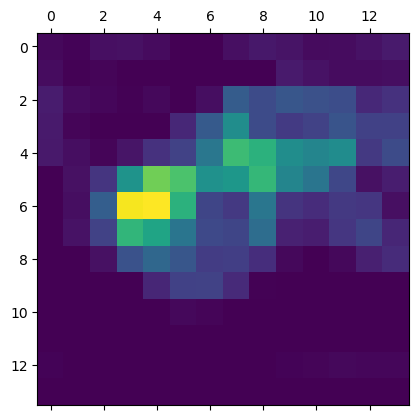

In [161]:
# Heatmap post-processing
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [162]:
#superimpose image and heatmap with keras
img = keras.utils.load_img(img_path)
img = keras.utils.img_to_array(img)

heatmap = np.uint8(255 * heatmap)

jet = plt.colormaps.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

jet_heatmap = keras.utils.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.utils.img_to_array(jet_heatmap)

superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.utils.array_to_img(superimposed_img)

save_path = "elephant_cam.jpg"
superimposed_img.save(save_path)

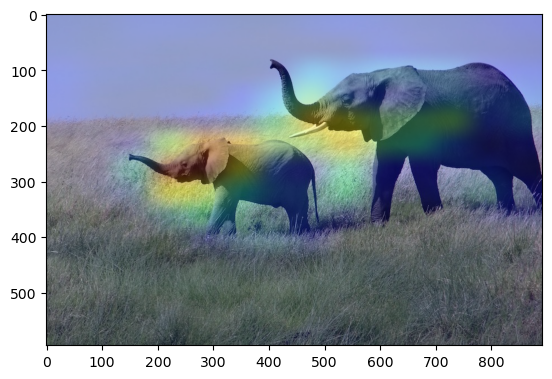

In [163]:
plt.imshow(superimposed_img)

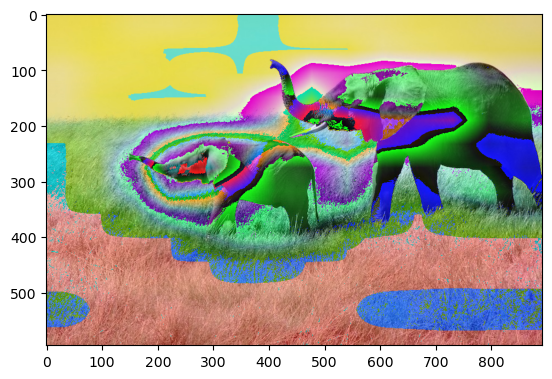

In [164]:
#Superimpose image and heatmap with CV2
img = cv2.imread(img_path)
INTENSITY = 1
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
superimposed_img = heatmap * INTENSITY + img
cv2.imwrite('elephant_cam2.jpg', superimposed_img)
plt.imshow(superimposed_img)
plt.show()